In [3]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

## 連結性とパーコレーション
以下のサンプルコードが分かりやすい  
https://networkx.github.io/documentation/networkx-2.0/auto_examples/drawing/plot_giant_component.html?highlight=largest%20component

PyGraphviz and pydot not found;
drawing with spring layout;
will be slow.


C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


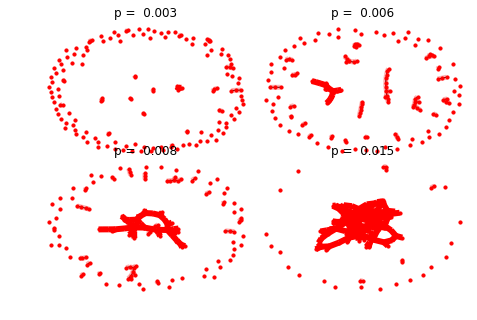

In [2]:
#    Copyright (C) 2006-2017
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import math

import matplotlib.pyplot as plt
import networkx as nx

try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
    layout = graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
        layout = graphviz_layout
    except ImportError:
        print("PyGraphviz and pydot not found;\n"
              "drawing with spring layout;\n"
              "will be slow.")
        layout = nx.spring_layout

n = 150  # 150 nodes
# p value at which giant component (of size log(n) nodes) is expected
p_giant = 1.0 / (n - 1)
# p value at which graph is expected to become completely connected
p_conn = math.log(n) / float(n)

# the following range of p values should be close to the threshold
pvals = [0.003, 0.006, 0.008, 0.015]

region = 220  # for pylab 2x2 subplot layout
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.01, hspace=0.01)
for p in pvals:
    G = nx.binomial_graph(n, p)
    pos = layout(G)
    region += 1
    plt.subplot(region)
    plt.title("p = %6.3f" % (p))
    nx.draw(G, pos,
            with_labels=False,
            node_size=10
           )
    # identify largest connected component
    Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
    G0 = Gcc[0]
    nx.draw_networkx_edges(G0, pos,
                           with_labels=False,
                           edge_color='r',
                           width=6.0
                          )
    # show other connected components
    for Gi in Gcc[1:]:
        if len(Gi) > 1:
            nx.draw_networkx_edges(Gi, pos,
                                   with_labels=False,
                                   edge_color='r',
                                   alpha=0.3,
                                   width=5.0
                                  )
plt.show()

### 上のコードを参考にしてErdos-Renyi graphでのpによる最大連結成分の変化を見る


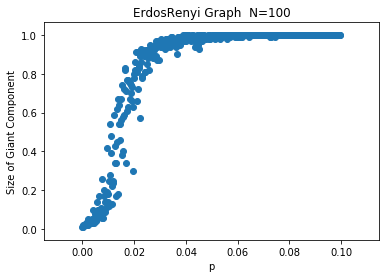

In [3]:
import sys
n=100
pval=np.array([])
for i in range(500):
    pval=np.append(pval,i/5000)
gcc_size=np.array([])
for p in pval:
    G=nx.erdos_renyi_graph(n, p)
    Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
    gcc_size=np.append(gcc_size,Gcc[0].number_of_nodes()/n)
plt.title('ErdosRenyi Graph  N='+str(n))
plt.ylabel('Size of Giant Component')
plt.xlabel('p')
plt.scatter(pval,gcc_size)
plt.show()

## 相転移現象としてのnode/edge failure

### 正方格子グラフを用意してランダムにEdgeを取り除いていく

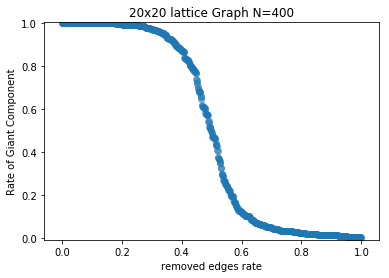

In [4]:
import sys
n=20
pval=np.array([])
gcc_size=np.array([])
G=nx.grid_2d_graph(n, n, periodic=False, create_using=None)
G_N=G.number_of_nodes()
G_M=G.number_of_edges()
loop=10
for p in range(loop):
    if(p==0):
        for i in range(G.number_of_edges()):
            edges_list=list(G.edges)
            rnd=np.random.randint(0,len(edges_list))
            G.remove_edge(edges_list[rnd][0],edges_list[rnd][1])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            if(Gcc is False):break
            pval=np.append(pval,i/G_M)
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size=np.append(gcc_size,con_nodes/G_N/loop)
    else:
        G=nx.grid_2d_graph(n, n, periodic=False, create_using=None)
        for i in range(G.number_of_edges()):
            edges_list=list(G.edges)
            rnd=np.random.randint(0,len(edges_list))
            G.remove_edge(edges_list[rnd][0],edges_list[rnd][1])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            if(Gcc is False):break
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size[i]+=con_nodes/G_N/loop
    
plt.title(str(n)+'x'+str(n)+' lattice Graph N='+str(G_N))
plt.ylabel('Rate of Giant Component')
plt.xlabel('removed edges rate')
plt.ylim(-0.007,1.003)
plt.scatter(pval,gcc_size,alpha=0.5)
plt.show()

### 同様のグラフを用意してランダムにNodeを取り除く

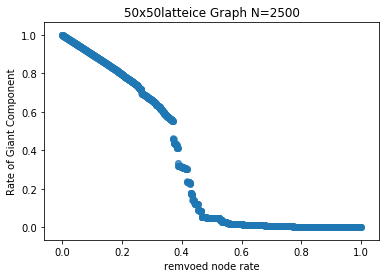

In [5]:
import sys
n=50
pval=np.array([])
gcc_size=np.array([])
G=nx.grid_2d_graph(n, n, periodic=False, create_using=None)
G_N=G.number_of_nodes()
G_M=G.number_of_edges()
for p in range(1):
    for i in range(G.number_of_edges()):
        nodes_list=list(G)
        G.remove_node(nodes_list[np.random.randint(0,len(nodes_list))])
        Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
        pval=np.append(pval,i/G_N)
        con_nodes=float(Gcc[0].number_of_nodes())
        gcc_size=np.append(gcc_size,[con_nodes/G_N])
        if(G.number_of_nodes()==1):break
plt.title(str(n)+'x'+str(n)+'latteice Graph N='+str(G_N))
plt.ylabel('Rate of Giant Component')
plt.xlabel('remvoed node rate')
plt.scatter(pval,gcc_size,alpha=0.5)
plt.show()

### BA modelで同じようにEdgeのランダム除去を行う

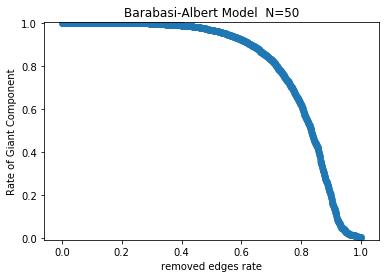

In [6]:
pval=np.array([])
gcc_size=np.array([])
G=nx.barabasi_albert_graph(400,4)
G_N=G.number_of_nodes()
G_M=G.number_of_edges()
loop=10
for p in range(loop):
    if(p==0):
        for i in range(G.number_of_edges()):
            edges_list=list(G.edges)
            rnd=np.random.randint(0,len(edges_list))
            G.remove_edge(edges_list[rnd][0],edges_list[rnd][1])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            if(Gcc is False):break
            pval=np.append(pval,i/G_M)
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size=np.append(gcc_size,con_nodes/G_N/loop)
    else:
        G=nx.barabasi_albert_graph(400,4)
        for i in range(G.number_of_edges()):
            edges_list=list(G.edges)
            rnd=np.random.randint(0,len(edges_list))
            G.remove_edge(edges_list[rnd][0],edges_list[rnd][1])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            if(Gcc is False):break
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size[i]+=con_nodes/G_N/loop
    
plt.title('Barabasi-Albert Model  N='+str(n))
plt.ylabel('Rate of Giant Component')
plt.xlabel('removed edges rate')
plt.ylim(-0.007,1.003)
plt.scatter(pval,gcc_size,alpha=0.5)
plt.show()

### BA modelでランダムにノードを除去する

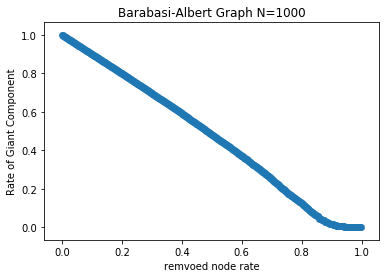

In [7]:
pval=np.array([])
gcc_size=np.array([])
G=nx.barabasi_albert_graph(1000,4)
G_N=G.number_of_nodes()
G_M=G.number_of_edges()
loop=5
for p in range(loop):
    if(p==0):
        for i in range(G.number_of_edges()):
            nodes_list=list(G)
            G.remove_node(nodes_list[np.random.randint(0,len(nodes_list))])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            pval=np.append(pval,i/G_N/loop)
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size=np.append(gcc_size,[con_nodes/G_N/loop])
            if(G.number_of_nodes()==1):break
    else:
        G=nx.barabasi_albert_graph(1000,4)
        for i in range(G.number_of_edges()):
            nodes_list=list(G)
            G.remove_node(nodes_list[np.random.randint(0,len(nodes_list))])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            pval[i]+=i/G_N/loop
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size[i]+=con_nodes/G_N/loop
            if(G.number_of_nodes()==1):break
        
plt.title('Barabasi-Albert Graph N='+str(G_N))
plt.ylabel('Rate of Giant Component')
plt.xlabel('remvoed node rate')
plt.scatter(pval,gcc_size,alpha=0.5)
plt.show()

### BA modelにおいて次数順にノードを取り除く
エッジはめんどくさいので省略

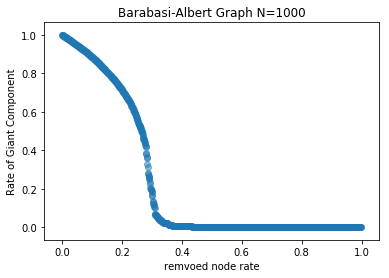

In [8]:
pval=np.array([])
gcc_size=np.array([])
G=nx.barabasi_albert_graph(1000,4)
G_N=G.number_of_nodes()
G_M=G.number_of_edges()
loop=5
for p in range(loop):
    if(p==0):
        for i in range(G.number_of_edges()):
            degree_list=np.array([])
            nodes_list=list(G)
            for j in range(len(nodes_list)):
                degree_list=np.append(degree_list,G.degree[nodes_list[j]])
            max_node=np.argmax(degree_list)
            G.remove_node(nodes_list[max_node])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            pval=np.append(pval,i/G_N/loop)
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size=np.append(gcc_size,[con_nodes/G_N/loop])
            if(G.number_of_nodes()==1):break
    else:
        G=nx.barabasi_albert_graph(1000,4)
        for i in range(G.number_of_edges()):
            degree_list=np.array([])
            nodes_list=list(G)
            for j in range(len(nodes_list)):
                degree_list=np.append(degree_list,G.degree[nodes_list[j]])
            max_node=np.argmax(degree_list)
            G.remove_node(nodes_list[max_node])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            pval[i]+=i/G_N/loop
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size[i]+=[con_nodes/G_N/loop]
            if(G.number_of_nodes()==1):break
        
plt.title('Barabasi-Albert Graph N='+str(G_N))
plt.ylabel('Rate of Giant Component')
plt.xlabel('remvoed node rate')
plt.scatter(pval,gcc_size,alpha=0.5)
plt.show()

### Molly-Reed criterion
$$
\mathrm{MollyReed  Criterion}=\frac{<k^2>}{<k>}
$$
BA modelにおけるランダム攻撃と次数順攻撃についてのMolly-Reed基準を見てみる  
${<k^2>}/{<k>}\ge2$が連結の基準となっている

In [4]:
def MR_criterion(deg):
    kk=0
    k=0
    n_deg=len(deg)
    for i in deg:
        kk+=i**2/n_deg
        k+=i/n_deg
    mrc=kk/k
    return mrc

ランダム

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


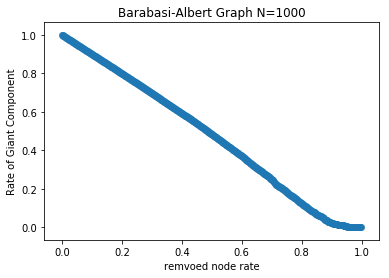

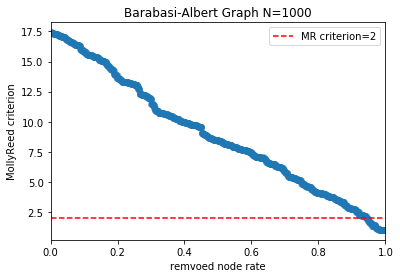

In [6]:
pval=np.array([])
gcc_size=np.array([])
MRC=np.array([])
G=nx.barabasi_albert_graph(1000,4)
G_N=G.number_of_nodes()
G_M=G.number_of_edges()
loop=5
for p in range(loop):
    if(p==0):
        for i in range(G.number_of_edges()):
            #
            degree_list=np.array([])
            nodes_list=list(G)
            for j in range(len(nodes_list)):
                degree_list=np.append(degree_list,G.degree[nodes_list[j]])
            mc_r=MR_criterion(degree_list)
            if(np.isnan(mc_r)):
                mc_r=1
            MRC=np.append(MRC,[mc_r/loop])
            #
            G.remove_node(nodes_list[np.random.randint(0,len(nodes_list))])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            pval=np.append(pval,i/G_N/loop)
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size=np.append(gcc_size,[con_nodes/G_N/loop])
            if(G.number_of_nodes()==1):break
    else:
        G=nx.barabasi_albert_graph(1000,4)
        for i in range(G.number_of_edges()):
            #
            degree_list=np.array([])
            nodes_list=list(G)
            for j in range(len(nodes_list)):
                degree_list=np.append(degree_list,G.degree[nodes_list[j]])
            mc_r=MR_criterion(degree_list)
            if(np.isnan(mc_r)):
                mc_r=1
            MRC[i]+=mc_r/loop
            #
            G.remove_node(nodes_list[np.random.randint(0,len(nodes_list))])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            pval[i]+=i/G_N/loop
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size[i]+=con_nodes/G_N/loop
            if(G.number_of_nodes()==1):break
        
plt.title('Barabasi-Albert Graph N='+str(G_N))
plt.ylabel('Rate of Giant Component')
plt.xlabel('remvoed node rate')
plt.scatter(pval,gcc_size,alpha=0.5)
plt.show()

plt.title('Barabasi-Albert Graph N='+str(G_N))
plt.ylabel('MollyReed criterion')
plt.xlabel('remvoed node rate')
plt.xlim(0,1)
p = plt.hlines([2], 0, 1, "r", linestyles='dashed',label='MR criterion=2') 
plt.scatter(pval,MRC,alpha=0.5)
plt.legend()
plt.show()

次数順

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


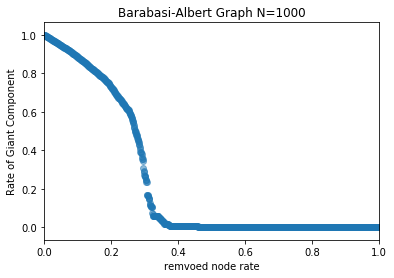

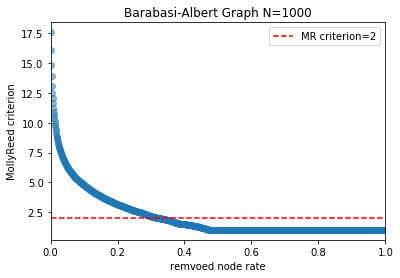

In [7]:
pval=np.array([])
gcc_size=np.array([])
MRC=np.array([])
G=nx.barabasi_albert_graph(1000,4)
G_N=G.number_of_nodes()
G_M=G.number_of_edges()
loop=2
for p in range(loop):
    if(p==0):
        for i in range(G.number_of_edges()):
            degree_list=np.array([])
            nodes_list=list(G)
            for j in range(len(nodes_list)):
                degree_list=np.append(degree_list,G.degree[nodes_list[j]])
            mc_r=MR_criterion(degree_list)
            if(np.isnan(mc_r)):
                mc_r=1
            MRC=np.append(MRC,[mc_r/loop])
            max_node=np.argmax(degree_list)
            G.remove_node(nodes_list[max_node])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            pval=np.append(pval,i/G_N/loop)
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size=np.append(gcc_size,[con_nodes/G_N/loop])
            if(G.number_of_nodes()==1):break
    else:
        G=nx.barabasi_albert_graph(1000,4)
        for i in range(G.number_of_edges()):
            degree_list=np.array([])
            nodes_list=list(G)
            for j in range(len(nodes_list)):
                degree_list=np.append(degree_list,G.degree[nodes_list[j]])
            mc_r=MR_criterion(degree_list)
            if(np.isnan(mc_r)):
                mc_r=1
            MRC[i]+=mc_r/loop
            max_node=np.argmax(degree_list)
            G.remove_node(nodes_list[max_node])
            Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
            pval[i]+=i/G_N/loop
            con_nodes=float(Gcc[0].number_of_nodes())
            gcc_size[i]+=[con_nodes/G_N/loop]
            if(G.number_of_nodes()==1):break

#print(len(MRC))
#print(len(gcc_size))
plt.title('Barabasi-Albert Graph N='+str(G_N))
plt.ylabel('Rate of Giant Component')
plt.xlabel('remvoed node rate')
plt.xlim(0,1)
plt.scatter(pval,gcc_size,alpha=0.5)
plt.show()

plt.title('Barabasi-Albert Graph N='+str(G_N))
plt.ylabel('MollyReed criterion')
plt.xlabel('remvoed node rate')
plt.xlim(0,1)
p = plt.hlines([2], 0, 1, "r", linestyles='dashed',label='MR criterion=2') 
plt.scatter(pval,MRC,alpha=0.5)
plt.legend()
plt.show()